In [1]:
import os
import statsmodels.api as sm     # install statsmodels if not installed
import statsmodels.formula.api as smf
import random
from tqdm import tqdm
import pandas as pd
import numpy as np
from datetime import datetime as dt
from datetime import timedelta
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import math

# 1. Data preparation

## -1. Loading Both data

In [4]:
file_list = os.listdir('D:/Working_Place/new_uber/data/data_processed')
file_list.remove('.ipynb_checkpoints')
file_list

['f1902.parquet',
 'f1903.parquet',
 'f1904.parquet',
 'f1905.parquet',
 'f1906.parquet',
 'f1907.parquet',
 'f1908.parquet',
 'f1909.parquet',
 'f1910.parquet',
 'f1911.parquet',
 'f1912.parquet',
 'f2001.parquet',
 'f2002.parquet',
 'f2003.parquet',
 'f2004.parquet',
 'f2005.parquet',
 'f2006.parquet',
 'f2007.parquet',
 'f2008.parquet',
 'f2009.parquet',
 'f2010.parquet',
 'f2011.parquet',
 'f2012.parquet',
 'f2101.parquet',
 'f2102.parquet',
 'f2103.parquet',
 'f2104.parquet',
 'f2105.parquet',
 'f2106.parquet',
 'f2107.parquet',
 'f2108.parquet',
 'f2109.parquet',
 'f2110.parquet',
 'f2111.parquet',
 'f2112.parquet',
 'f2201.parquet',
 'f2202.parquet',
 'f2203.parquet',
 'f2204.parquet',
 'f2205.parquet',
 'f2206.parquet',
 'f2207.parquet',
 'f2208.parquet',
 'f2209.parquet',
 'f2210.parquet',
 'f2211.parquet',
 'f2212.parquet',
 'y1901.parquet',
 'y1902.parquet',
 'y1903.parquet',
 'y1904.parquet',
 'y1905.parquet',
 'y1906.parquet',
 'y1907.parquet',
 'y1908.parquet',
 'y1909.pa

In [29]:
yellow_data_samples = []
fhvhv_data_samples = []
for file in tqdm(file_list):
    if 'f' in file:
        each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file,
                                   columns=['hvfhs_license_num','pickup_datetime',
                                           'dropoff_datetime', 'PULocationID', 'DOLocationID', 'trip_distance',
                                           'trip_time', 'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
                                           'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
                                           'average_speed'])
        each_data_sampled = each_data.sample(frac=0.01)
        fhvhv_data_samples.append(each_data_sampled)
    elif 'y' in file:
        if file=='y1901.parquet':
            continue
        each_data = pd.read_parquet('D:/Working_Place/new_uber/data/data_processed/'+file)
        each_data_sampled = each_data.sample(frac=0.01)
        yellow_data_samples.append(each_data_sampled)
    del each_data
    del each_data_sampled

100%|██████████████████████████████████████████████████████████████████████████████████| 95/95 [08:57<00:00,  5.66s/it]


In [30]:
yellow_data_sample = pd.concat(yellow_data_samples)
fhvhv_data_sample = pd.concat(fhvhv_data_samples)
display(yellow_data_sample.head())
display(fhvhv_data_sample.head())

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,average_speed
index,,,,,,,,,,,,,,,,,,,,
4365092,2,2019-02-18 09:44:47,2019-02-18 09:50:48,2.0,0.80,1.0,N,170,186,1,5.5,0.0,0.5,1.76,0.0,0.3,8.06,2.5,0.0,7.977839
3908352,2,2019-02-16 04:51:18,2019-02-16 04:54:00,1.0,0.68,1.0,N,238,239,2,4.5,0.5,0.5,0.00,0.0,0.3,5.80,2.5,0.0,15.111111
3169673,2,2019-02-13 12:44:11,2019-02-13 13:02:18,2.0,1.91,1.0,N,137,90,1,12.0,0.0,0.5,3.06,0.0,0.3,15.86,2.5,0.0,6.325667
2366201,2,2019-02-09 22:14:55,2019-02-09 22:29:21,1.0,2.06,1.0,N,144,137,1,10.5,0.5,0.5,2.86,0.0,0.3,14.66,2.5,0.0,8.563510
5924181,2,2019-02-24 18:52:03,2019-02-24 19:09:53,1.0,2.91,1.0,N,141,234,1,13.5,0.0,0.5,3.36,0.0,0.3,17.66,2.5,0.0,9.790654


,hvfhs_license_num,pickup_datetime,dropoff_datetime,PULocationID,DOLocationID,trip_distance,trip_time,base_passenger_fare,tolls,bcf,sales_tax,congestion_surcharge,airport_fee,tips,driver_pay,average_speed
index,,,,,,,,,,,,,,,,
16209079,HV0003,2019-02-23 17:27:59,2019-02-23 17:58:19,97,76,7.6797,1819,21.96,0.0,0.55,1.95,0.00,0.0,0.0,20.31,15.198966
2558297,HV0004,2019-02-04 06:38:39,2019-02-04 06:52:07,239,140,3.5903,808,4.73,0.0,0.00,0.42,0.75,0.0,0.0,0.00,15.996386
778342,HV0005,2019-02-01 22:27:38,2019-02-01 22:43:13,9,16,4.3309,899,13.29,0.0,0.33,1.18,0.00,0.0,0.0,9.97,17.342870
8250515,HV0003,2019-02-12 11:16:26,2019-02-12 11:24:08,141,162,1.3846,461,7.18,0.0,0.18,0.64,2.75,0.0,0.0,5.43,10.812495
18791261,HV0003,2019-02-27 07:06:25,2019-02-27 07:26:37,35,61,4.2987,1212,18.28,0.0,0.46,1.62,0.00,0.0,0.0,17.15,12.768416


In [31]:
yellow_data_sample['tip_rate']=yellow_data_sample.apply(lambda x: x.tip_amount/x.fare_amount,axis=1)
fhvhv_data_sample['tip_rate']=fhvhv_data_sample.apply(lambda x: x.tips/x.base_passenger_fare,axis=1)

In [32]:
yellow_data_sample['trip_time'] = yellow_data_sample.apply(lambda x: (x.tpep_dropoff_datetime-x.tpep_pickup_datetime).seconds,axis=1)

In [33]:
uber_data_sample = fhvhv_data_sample[fhvhv_data_sample.hvfhs_license_num=='HV0003']

## -2. Grouping by pickup_datetime

In [13]:
type(yellow_data_sample.loc[5861723,'tpep_pickup_datetime']),type(uber_data_sample.loc[18043861,'pickup_datetime'])

(pandas._libs.tslibs.timestamps.Timestamp,
 pandas._libs.tslibs.timestamps.Timestamp)

In [36]:
yellow_data_sample.columns,uber_data_sample.columns

(Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
        'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
        'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
        'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
        'total_amount', 'congestion_surcharge', 'airport_fee', 'average_speed',
        'tip_rate', 'trip_time'],
       dtype='object'),
 Index(['hvfhs_license_num', 'pickup_datetime', 'dropoff_datetime',
        'PULocationID', 'DOLocationID', 'trip_distance', 'trip_time',
        'base_passenger_fare', 'tolls', 'bcf', 'sales_tax',
        'congestion_surcharge', 'airport_fee', 'tips', 'driver_pay',
        'average_speed', 'tip_rate'],
       dtype='object'))

In [37]:
yellow_data_sample.rename(columns={'trip_distance':'y_trip_distance',
                                  'trip_time':'y_trip_time',
                                  'passenger_count':'y_passenger_count',
                                  'fare_amount':'y_fare_amount',
                                  'tip_amount':'y_tip_amount',
                                  'tip_rate':'y_tip_rate',
                                  'airport_fee':'y_airport_fee',
                                  'average_speed':'y_average_speed'},
                         inplace=True)
uber_data_sample.rename(columns={'trip_distance':'u_trip_distance',
                                  'trip_time':'u_trip_time',
                                  'base_passenger_fare':'u_base_passenger_fare',
                                  'tips':'u_tip_amount',
                                  'tip_rate':'u_tip_rate',
                                  'airport_fee':'u_airport_fee',
                                  'average_speed':'u_average_speed'},
                         inplace=True)

D:\Anaconda\envs\new_uber\lib\site-packages\pandas\core\frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [39]:
yellow_daily = yellow_data_sample.groupby([yellow_data_sample.tpep_pickup_datetime.dt.year,
                                       yellow_data_sample.tpep_pickup_datetime.dt.month,
                                        yellow_data_sample.tpep_pickup_datetime.dt.day]).agg({'y_trip_distance':['count','mean'],
                                                                                              'y_trip_time':'mean',
                                                                                              'y_passenger_count':'mean',
                                                                                              'y_fare_amount':'mean',
                                                                                              'y_tip_amount':'mean',
                                                                                               'y_tip_rate':'mean',
                                                                                              'y_airport_fee':['sum','mean'],
                                                                                              'y_average_speed':'mean'})

uber_daily = uber_data_sample.groupby([uber_data_sample.pickup_datetime.dt.year,
                                       uber_data_sample.pickup_datetime.dt.month,
                                        uber_data_sample.pickup_datetime.dt.day]).agg({'u_trip_distance':['count','mean'],
                                                                                      'u_trip_time':'mean',
                                                                                      'u_base_passenger_fare':'mean',
                                                                                      'u_tip_amount':'mean',
                                                                                       'u_tip_rate':'mean',
                                                                                       'u_airport_fee':['sum','mean'],
                                                                                      'u_average_speed':'mean'})
display(yellow_daily)
display(uber_daily)

y_trip_distance  \
                                                                         count   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                   
2019                 2                    1                               2802   
                                          2                               2484   
                                          3                               2010   
                                          4                               2090   
                                          5                               2338   
...                                                                        ...   
2022                 12                   27                               694   
                                          28                               789   
                                          29                               827   
                                          30                               800   
                                          31                               680   

                                                                          \
                                                                    mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime             
2019                 2                    1                     2.257284   
                                          2                     2.096610   
                                          3                     2.258418   
                                          4                     2.447163   
                                          5                     2.327750   
...                                                                  ...   
2022                 12                   27                    2.927839   
                                          28                    2.872966   
                                          29                    3.123216   
                                          30                    3.317075   
                                          31                    2.521559   

                                                                y_trip_time  \
                                                                       mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                
2019                 2                    1                     1006.843326   
                                          2                      934.172705   
                                          3                      864.161194   
                                          4                     1105.066029   
                                          5                     1015.971771   
...                                                                     ...   
2022                 12                   27                     959.092219   
                                          28                    1070.514575   
                                          29                    1063.983071   
                                          30                    1027.320000   
                                          31                     862.583824   

                                                               y_passenger_count  \
                                                                            mean   
tpep_pickup_datetime tpep_pickup_datetime tpep_pickup_datetime                     
2019                 2                    1                             1.539258   
                                          2                             1.672303   
                                          3                             1.628358   
                                          4                             1.553110   
                                          5                             1.586399   
...                                                                   

u_trip_distance            \
                                                          count      mean   
pickup_datetime pickup_datetime pickup_datetime                             
2019            2               1                          5542  6.016813   
                                2                          5472  6.214303   
                                3                          4743  6.367562   
                                4                          3764  6.340633   
                                5                          3573  6.442834   
...                                                         ...       ...   
2022            12              27                         3075  6.646410   
                                28                         3282  6.854391   
                                29                         3414  6.902910   
                                30                         3937  7.138872   
                                31                         4716  6.343007   

                                                 u_trip_time  \
                                                        mean   
pickup_datetime pickup_datetime pickup_datetime                
2019            2               1                1096.497113   
                                2                1048.455409   
                                3                 980.118280   
                                4                1095.193411   
                                5                1094.126784   
...                                                      ...   
2022            12              27               1068.637398   
                                28               1111.608775   
                                29               1131.219391   
                                30               1153.184658   
                                31                967.642706   

                                                u_base_passenger_fare  \
                                                                 mean   
pickup_datetime pickup_datetime pickup_datetime                         
2019            2               1                           14.380976   
                                2                           13.552421   
                                3                           13.053730   
                                4                           13.735308   
                                5                           14.668897   
...                                                               ...   
2022            12              27                          21.035629   
                                28                          20.887197   
                                29                          21.010176   
                                30                          21.599408   
                                31                          20.808868   

                                                u_tip_amount u_tip_rate  \
                                                        mean       mean   
pickup_datetime pickup_datetime pickup_datetime                           
2019            2               1                   0.339471   0.023676   
                                2                   0.326639   0.060544   
                                3                   0.271507   0.022408   
                                4                   0.337070   0.023994   
                                5                   0.380512   0.024132   
...                                                      ...        ...   
2022            12              27                  0.903993   0.043612   
                                28                  0.899896   0.044037   
                                29                  0.936084   0.043516   
                                30                  0.967079   0.044949   
                                31                  0.841489   0.043219   

In [41]:
yu_daily = pd.concat([yellow_daily,uber_daily],axis=1)
yu_daily

y_trip_distance            y_trip_time y_passenger_count  \
                     count      mean         mean              mean   
2019 2  1           2802.0  2.257284  1006.843326          1.539258   
        2           2484.0  2.096610   934.172705          1.672303   
        3           2010.0  2.258418   864.161194          1.628358   
        4           2090.0  2.447163  1105.066029          1.553110   
        5           2338.0  2.327750  1015.971771          1.586399   
...                    ...       ...          ...               ...   
2022 12 27           694.0  2.927839   959.092219          1.517291   
        28           789.0  2.872966  1070.514575          1.533587   
        29           827.0  3.123216  1063.983071          1.499395   
        30           800.0  3.317075  1027.320000          1.560000   
        31           680.0  2.521559   862.583824          1.605882   

           y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                    mean         mean       mean           sum      mean   
2019 2  1      11.166014     1.692612   0.157245          0.00  0.000000   
        2      10.121288     1.674694   0.176947          0.00  0.000000   
        3      10.272562     1.817328   0.192036          0.00  0.000000   
        4      11.329718     2.011512   0.189519          0.00  0.000000   
        5      11.294405     2.073999   0.193459          0.00  0.000000   
...                  ...          ...        ...           ...       ...   
2022 12 27     17.433429     2.941239   0.187915         60.00  0.086455   
        28     17.360837     2.878720   0.186312         63.75  0.080798   
        29     18.314510     3.135526   0.185429         67.50  0.081620   
        30     19.391000     3.447775   0.195403         73.75  0.092188   
        31     14.895118     2.592368   0.195087         20.00  0.029412   

           y_average_speed u_trip_distance            u_trip_time  \
                      mean           count      mean         mean   
2019 2  1         9.643177          5542.0  6.016813  1096.497113   
        2        10.615953          5472.0  6.214303  1048.455409   
        3        11.898008          4743.0  6.367562   980.118280   
        4        10.547354          3764.0  6.340633  1095.193411   
        5         9.945755          3573.0  6.442834  1094.126784   
...                    ...             ...       ...          ...   
2022 12 27       10.269307          3075.0  6.646410  1068.637398   
        28       10.190145          3282.0  6.854391  1111.608775   
        29       10.645389          3414.0  6.902910  1131.219391   
        30       10.842674          3937.0  7.138872  1153.184658   
        31       11.942462          4716.0  6.343007   967.642706   

           u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                            mean         mean       mean           sum   
2019 2  1              14.380976     0.339471   0.023676          0.00   
        2              13.552421     0.326639   0.060544          0.00   
        3              13.053730     0.271507   0.022408          0.00   
        4              13.735308     0.337070   0.023994          0.00   
        5              14.668897     0.380512   0.024132          0.00   
...                          ...          ...        ...           ...   
2022 12 27             21.035629     0.903993   0.043612        561.25   
        28             20.887197     0.899896   0.044037        522.50   
        29             21.010176     0.936084   0.043516        543.75   
        30             21.599408     0.967079   0.044949        736.25   
        31             20.808868     0.841489   0.043219        372.50   

                     u_average_speed  
                mean            mean  
2019 2  1   0.000000       18.588118  
        2   0.000000       20.131681  
        3   0.000000       22.031999  
        4   0.000000       19.958525  
   

In [90]:
yellow_daily.index, uber_daily.index

(MultiIndex([(2019,  2,  1),
             (2019,  2,  2),
             (2019,  2,  3),
             (2019,  2,  4),
             (2019,  2,  5),
             (2019,  2,  6),
             (2019,  2,  7),
             (2019,  2,  8),
             (2019,  2,  9),
             (2019,  2, 10),
             ...
             (2022, 12, 22),
             (2022, 12, 23),
             (2022, 12, 24),
             (2022, 12, 25),
             (2022, 12, 26),
             (2022, 12, 27),
             (2022, 12, 28),
             (2022, 12, 29),
             (2022, 12, 30),
             (2022, 12, 31)],
            names=['tpep_pickup_datetime', 'tpep_pickup_datetime', 'tpep_pickup_datetime'], length=1429),
 MultiIndex([(2019,  2,  1),
             (2019,  2,  2),
             (2019,  2,  3),
             (2019,  2,  4),
             (2019,  2,  5),
             (2019,  2,  6),
             (2019,  2,  7),
             (2019,  2,  8),
             (2019,  2,  9),
             (2019,  2, 10),
      

In [95]:
for i in yellow_daily.index:
    if i not in uber_daily.index:
        print(i)

(2019, 8, 4)


In [96]:
for i in uber_daily.index:
    if i not in yellow_daily.index:
        print(i)

(2022, 9, 18)


In [97]:
yellow_daily.drop([(2019,8,4)],axis=0,inplace=True)
uber_daily.drop([(2022,9,18)],axis=0,inplace=True)

In [98]:
len(yellow_daily),len(uber_daily)

(1428, 1428)

In [99]:
yu_daily = pd.concat([yellow_daily,uber_daily],axis=1)
yu_daily

y_trip_distance            y_trip_time y_passenger_count  \
                     count      mean         mean              mean   
2019 2  1             2802  2.257284  1006.843326          1.539258   
        2             2484  2.096610   934.172705          1.672303   
        3             2010  2.258418   864.161194          1.628358   
        4             2090  2.447163  1105.066029          1.553110   
        5             2338  2.327750  1015.971771          1.586399   
...                    ...       ...          ...               ...   
2022 12 27             694  2.927839   959.092219          1.517291   
        28             789  2.872966  1070.514575          1.533587   
        29             827  3.123216  1063.983071          1.499395   
        30             800  3.317075  1027.320000          1.560000   
        31             680  2.521559   862.583824          1.605882   

           y_fare_amount y_tip_amount y_tip_rate y_airport_fee            \
                    mean         mean       mean           sum      mean   
2019 2  1      11.166014     1.692612   0.157245          0.00  0.000000   
        2      10.121288     1.674694   0.176947          0.00  0.000000   
        3      10.272562     1.817328   0.192036          0.00  0.000000   
        4      11.329718     2.011512   0.189519          0.00  0.000000   
        5      11.294405     2.073999   0.193459          0.00  0.000000   
...                  ...          ...        ...           ...       ...   
2022 12 27     17.433429     2.941239   0.187915         60.00  0.086455   
        28     17.360837     2.878720   0.186312         63.75  0.080798   
        29     18.314510     3.135526   0.185429         67.50  0.081620   
        30     19.391000     3.447775   0.195403         73.75  0.092188   
        31     14.895118     2.592368   0.195087         20.00  0.029412   

           y_average_speed u_trip_distance            u_trip_time  \
                      mean           count      mean         mean   
2019 2  1         9.643177            5542  6.016813  1096.497113   
        2        10.615953            5472  6.214303  1048.455409   
        3        11.898008            4743  6.367562   980.118280   
        4        10.547354            3764  6.340633  1095.193411   
        5         9.945755            3573  6.442834  1094.126784   
...                    ...             ...       ...          ...   
2022 12 27       10.269307            3075  6.646410  1068.637398   
        28       10.190145            3282  6.854391  1111.608775   
        29       10.645389            3414  6.902910  1131.219391   
        30       10.842674            3937  7.138872  1153.184658   
        31       11.942462            4716  6.343007   967.642706   

           u_base_passenger_fare u_tip_amount u_tip_rate u_airport_fee  \
                            mean         mean       mean           sum   
2019 2  1              14.380976     0.339471   0.023676          0.00   
        2              13.552421     0.326639   0.060544          0.00   
        3              13.053730     0.271507   0.022408          0.00   
        4              13.735308     0.337070   0.023994          0.00   
        5              14.668897     0.380512   0.024132          0.00   
...                          ...          ...        ...           ...   
2022 12 27             21.035629     0.903993   0.043612        561.25   
        28             20.887197     0.899896   0.044037        522.50   
        29             21.010176     0.936084   0.043516        543.75   
        30             21.599408     0.967079   0.044949        736.25   
        31             20.808868     0.841489   0.043219        372.50   

                     u_average_speed  
                mean            mean  
2019 2  1   0.000000       18.588118  
        2   0.000000       20.131681  
        3   0.000000       22.031999  
        4   0.000000       19.958525  
   

<AxesSubplot:>

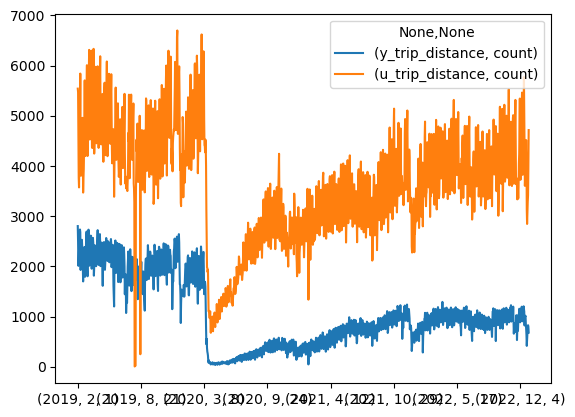

In [101]:
yu_daily.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')])

<AxesSubplot:>

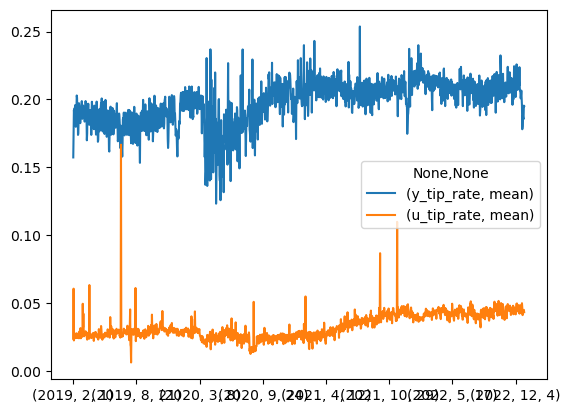

In [102]:
yu_daily.plot(y=[('y_tip_rate','mean'),('u_tip_rate','mean')])

In [103]:
yellow_hourly = yellow_data_sample.groupby(yellow_data_sample.tpep_pickup_datetime.dt.hour).agg({'y_trip_distance':['count','mean'],
                                                                                                  'y_trip_time':'mean',
                                                                                                  'y_passenger_count':'mean',
                                                                                                  'y_fare_amount':'mean',
                                                                                                  'y_tip_amount':'mean',
                                                                                                   'y_tip_rate':'mean',
                                                                                                  'y_airport_fee':['sum','mean'],
                                                                                                  'y_average_speed':'mean'})

uber_hourly = uber_data_sample.groupby(uber_data_sample.pickup_datetime.dt.hour).agg({'u_trip_distance':['count','mean'],
                                                                                      'u_trip_time':'mean',
                                                                                      'u_base_passenger_fare':'mean',
                                                                                      'u_tip_amount':'mean',
                                                                                       'u_tip_rate':'mean',
                                                                                       'u_airport_fee':['sum','mean'],
                                                                                      'u_average_speed':'mean'})
display(yellow_hourly)
display(uber_hourly)

y_trip_distance            y_trip_time y_passenger_count  \
                               count      mean         mean              mean   
tpep_pickup_datetime                                                            
0                              38196  2.663875   958.324432          1.583726   
1                              25674  2.615778   977.574745          1.578406   
2                              17850  2.589695   876.083978          1.597367   
3                              11374  2.655260   919.735625          1.580535   
4                               7520  2.775226  1062.701596          1.539096   
5                               8347  2.428426   891.517911          1.423625   
6                              24592  2.610778   909.177049          1.408995   
7                              49463  2.575413   969.320381          1.439925   
8                              65984  2.411979   986.922693          1.456838   
9                              70648  2.277311   934.524233          1.472271   
10                             74594  2.309899   965.225729          1.486098   
11                             80249  2.325857   978.731050          1.498436   
12                             86188  2.380991  1013.706096          1.502135   
13                             87089  2.540434  1056.577800          1.512315   
14                             94492  2.745887  1103.082896          1.519547   
15                             96727  2.863014  1153.461009          1.528415   
16                             92397  2.864439  1139.507203          1.521575   
17                            101186  2.695570  1069.853409          1.523057   
18                            107203  2.469834   993.026221          1.519724   
19                             96076  2.332999   914.547514          1.537127   
20                             81764  2.376876   897.743763          1.542904   
21                             78498  2.463082   893.997949          1.559326   
22                             71159  2.558828   939.366939          1.575893   
23                             55076  2.654734   933.435834          1.574897   

                     y_fare_amount y_tip_amount y_tip_rate y_airport_fee  \
                              mean         mean       mean           sum   
tpep_pickup_datetime                                                       
0                        11.332126     2.105025   0.201049        285.00   
1                        10.994558     1.998844   0.199773         62.50   
2                        10.758756     1.932532   0.197966         31.25   
3                        10.903355     1.861457   0.190949         17.50   
4                        11.322918     1.644742   0.163417         16.25   
5                        10.134920     1.504726   0.165102         70.00   
6                        10.722484     1.774324   0.182639        552.50   
7                        11.250511     2.010326   0.195545       1025.00   
8                        11.518682     2.122469   0.199825       1063.75   
9                        11.371561     2.059181   0.194300       1107.50   
10                       11.412084     2.003144   0.188842       1261.25   
11                       11.637968     2.039687   0.187883       1398.75   
12                       11.816048     2.049473   0.186293       1696.25   
13                       12.201254     2.082911   0.183463       1967.50   
14                       12.863038     2.194133   0.183967       2673.75   
15                       13.296683     2.261691   0.185320       2963.75   
16                       13.353679     2.383936   0.195820       2786.25   
17                       12.739273     2.338283   0.202765       2603.75   
18                       11.792255     2.244578   0.208334       2037.50   
19                       11.017507     2.136543   0.211169       1246.25   
20                       10.910204     2.111803   0.208387        865.00   
21       

u_trip_distance            u_trip_time u_base_passenger_fare  \
                          count      mean         mean                  mean   
pickup_datetime                                                                
0                        181304  6.301868   892.194182             17.516728   
1                        126664  6.112086   841.442059             16.692468   
2                         88134  6.187720   827.904044             16.844935   
3                         64508  6.445703   829.498264             17.176073   
4                         55146  7.057487   857.676404             18.459987   
5                         65651  7.629311   901.366575             18.111271   
6                        120485  7.801117  1010.428701             19.286223   
7                        195795  6.841314  1063.715279             19.167698   
8                        249196  6.331232  1071.248579             18.635585   
9                        234549  6.308633  1043.961701             17.493903   
10                       217616  6.465416  1048.118907             17.547487   
11                       220515  6.613717  1081.687282             18.207882   
12                       231432  6.719254  1109.605638             18.865334   
13                       242734  6.884306  1143.337765             19.431173   
14                       265014  7.051900  1224.425668             20.368690   
15                       276760  7.078724  1283.757555             21.061541   
16                       284277  6.899629  1283.412496             20.790023   
17                       313285  6.619288  1232.874479             20.423690   
18                       328012  6.347838  1126.167915             19.352638   
19                       317404  6.211422  1031.366000             17.757299   
20                       288751  6.271050   984.014795             17.105190   
21                       273485  6.331371   957.586701             17.272284   
22                       265821  6.445022   955.181506             18.302446   
23                       237829  6.452266   936.259460             18.489746   

                u_tip_amount u_tip_rate u_airport_fee            \
                        mean       mean           sum      mean   
pickup_datetime                                                   
0                   0.493795   0.027397       3735.00  0.020601   
1                   0.450515   0.027098       1228.75  0.009701   
2                   0.424782   0.026283        972.50  0.011034   
3                   0.408504   0.031868       2693.75  0.041758   
4                   0.513576   0.026331       6830.00  0.123853   
5                   0.576535   0.030278      10301.25  0.156909   
6                   0.598726   0.029001      13778.75  0.114361   
7                   0.609175   0.030440      14492.50  0.074019   
8                   0.626560   0.032022      14773.75  0.059286   
9                   0.650192   0.037109      14458.75  0.061645   
10                  0.707396   0.038423      15486.25  0.071163   
11                  0.742157   0.038459      17287.50  0.078396   
12                  0.775143   0.039271      19173.75  0.082848   
13                  0.766340   0.036556      22457.50  0.092519   
14                  0.771546   0.034667      26271.25  0.099132   
15                  0.801390   0.035060      28523.75  0.103063   
16                  0.786094   0.034230      25586.25  0.090005   
17                  0.760377   0.034364      22472.50  0.071732   
18                  0.716665   0.035911      17696.25  0.053950   
19                  0.623103   0.033852      13771.25  0.043387   
20                  0.580282   0.033154       9927.50  0.034381   
21                  0.592882   0.032956       7690.00  0.028119   
22                  0.605295   0.031544       6688.75  0.025163   
23                  0.568342   0.029161       6126.25  0.025759   

                u_average_speed  
           

In [104]:
yu_hourly = pd.concat([yellow_hourly,uber_hourly],axis=1)
yu_hourly

y_trip_distance            y_trip_time y_passenger_count y_fare_amount  \
             count      mean         mean              mean          mean   
0            38196  2.663875   958.324432          1.583726     11.332126   
1            25674  2.615778   977.574745          1.578406     10.994558   
2            17850  2.589695   876.083978          1.597367     10.758756   
3            11374  2.655260   919.735625          1.580535     10.903355   
4             7520  2.775226  1062.701596          1.539096     11.322918   
5             8347  2.428426   891.517911          1.423625     10.134920   
6            24592  2.610778   909.177049          1.408995     10.722484   
7            49463  2.575413   969.320381          1.439925     11.250511   
8            65984  2.411979   986.922693          1.456838     11.518682   
9            70648  2.277311   934.524233          1.472271     11.371561   
10           74594  2.309899   965.225729          1.486098     11.412084   
11           80249  2.325857   978.731050          1.498436     11.637968   
12           86188  2.380991  1013.706096          1.502135     11.816048   
13           87089  2.540434  1056.577800          1.512315     12.201254   
14           94492  2.745887  1103.082896          1.519547     12.863038   
15           96727  2.863014  1153.461009          1.528415     13.296683   
16           92397  2.864439  1139.507203          1.521575     13.353679   
17          101186  2.695570  1069.853409          1.523057     12.739273   
18          107203  2.469834   993.026221          1.519724     11.792255   
19           96076  2.332999   914.547514          1.537127     11.017507   
20           81764  2.376876   897.743763          1.542904     10.910204   
21           78498  2.463082   893.997949          1.559326     11.061935   
22           71159  2.558828   939.366939          1.575893     11.317040   
23           55076  2.654734   933.435834          1.574897     11.466653   

   y_tip_amount y_tip_rate y_airport_fee           y_average_speed  \
           mean       mean           sum      mean            mean   
0      2.105025   0.201049        285.00  0.007462       13.005536   
1      1.998844   0.199773         62.50  0.002434       13.446719   
2      1.932532   0.197966         31.25  0.001751       13.853243   
3      1.861457   0.190949         17.50  0.001539       14.228766   
4      1.644742   0.163417         16.25  0.002161       14.856327   
5      1.504726   0.165102         70.00  0.008386       14.966496   
6      1.774324   0.182639        552.50  0.022467       13.892238   
7      2.010326   0.195545       1025.00  0.020723       11.785831   
8      2.122469   0.199825       1063.75  0.016121       10.163053   
9      2.059181   0.194300       1107.50  0.015676        9.848906   
10     2.003144   0.188842       1261.25  0.016908        9.824429   
11     2.039687   0.187883       1398.75  0.017430        9.557136   
12     2.049473   0.186293       1696.25  0.019681        9.483979   
13     2.082911   0.183463       1967.50  0.022592        9.628728   
14     2.194133   0.183967       2673.75  0.028296        9.555967   
15     2.261691   0.185320       2963.75  0.030640        9.499142   
16     2.383936   0.195820       2786.25  0.030155        9.630582   
17     2.338283   0.202765       2603.75  0.025732        9.652758   
18     2.244578   0.208334       2037.50  0.019006        9.923995   
19     2.136543   0.211169       1246.25  0.012972       10.486055   
20     2.111803   0.208387        865.00  0.010579       11.103666   
21     2.157411   0.208656        706.25  0.008997       11.607599   
22     2.190252   0.207064        671.25  0.009433       11.921603   
23     2.154568   0.202937        543.75  0.009873       12.434877   

   u_trip_distance            u_trip_time u_base_passenger_fare u_tip_amount  \
             count      mean         mean                  mean         mean   
0           181304 

<AxesSubplot:>

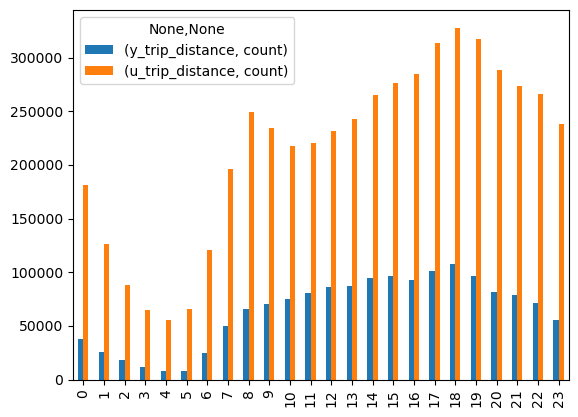

In [106]:
yu_hourly.plot(y=[('y_trip_distance','count'),('u_trip_distance','count')],kind='bar')

<AxesSubplot:>

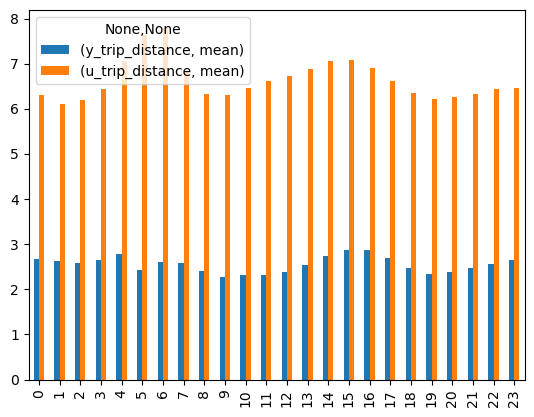

In [109]:
yu_hourly.plot(y=[('y_trip_distance','mean'),('u_trip_distance','mean')],kind='bar')

<AxesSubplot:>

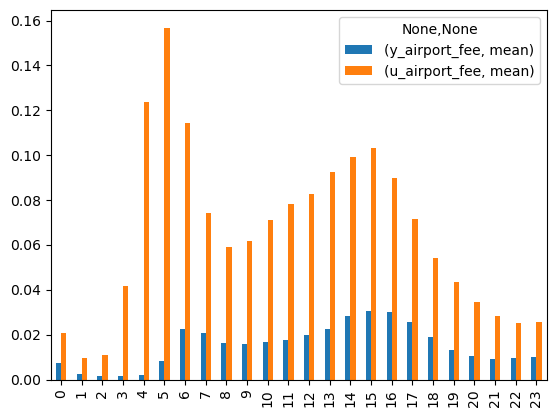

In [110]:
yu_hourly.plot(y=[('y_airport_fee','mean'),('u_airport_fee','mean')],kind='bar')